In [29]:
import re
import pandas as pd
import numpy as np
import json
import subprocess
import glob
import os
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')

In [1]:
y = [-133.1745,\
    -32.0589,\
    19.2109,\
    39.6996,\
    106.3229]

In [2]:
x = [0.1,\
    0.25,\
    0.4, \
    0.55, \
    0.7]

In [3]:
n = 4

In [4]:
a = [0.0, 0.0, 0.0, 0.0, 0.0]

In [5]:
for i in range(n + 1):
    a[i] = y[i]

In [11]:
print(a)

[-133.1745, -32.0589, 19.2109, 39.6996, 106.3229]


In [6]:
b = [0.0, 0.0, 0.0, 0.0]
d = [0.0, 0.0, 0.0, 0.0]
h = [0.0, 0.0, 0.0, 0.0]

In [7]:
for i in range(n):
    h[i] = x[i+1] - x[i]

In [12]:
print(h)

[0.15, 0.15000000000000002, 0.15000000000000002, 0.1499999999999999]


In [8]:
alpha = [0.0, 0.0, 0.0, 0.0]

In [9]:
for i in range(1, n, 1):
    alpha[i] = 3/h[i]*(a[i+1] - a[i])-3/h[i-1]*(a[i] - a[i-1])

In [10]:
print(alpha)

[0.0, -996.9159999999999, -615.6220000000001, 922.6920000000009]


In [14]:
c = [0.0, 0.0, 0.0, 0.0, 0.0]
l = [1.0, 0.0, 0.0, 0.0, 1.0]
mu = [0.0, 0.0, 0.0, 0.0, 0.0]
z = [0.0, 0.0, 0.0, 0.0, 0.0]

In [15]:
for i in range(1, n, 1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

In [18]:
print(l)

[1.0, 0.6000000000000001, 0.5625000000000001, 0.5599999999999998, 1.0]


In [19]:
print(mu)

[0.0, 0.25, 0.26666666666666666, 0.2678571428571428, 0.0]


In [20]:
print(z)

[0.0, -1661.5266666666664, -651.3653333333334, 1822.137142857145, 0.0]


In [21]:
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j]*c[j+1]
    b[j] = (a[j+1] - a[j])/h[j] - h[j]/3*(c[j+1]+2*c[j])
    d[j] = (c[j+1]-c[j])/3/h[j]

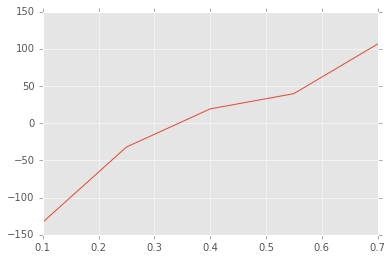

In [17]:
plt.plot(x,y)

In [40]:
def spline(x_):
    y = a[3] + b[3] * (x_ - x[3]) + c[3] * math.pow((x_ - x[3]),2) + d[3] * math.pow((x_ - x[3]),3)
    return y

In [43]:
print(a)

[-133.1745, -32.0589, 19.2109, 39.6996, 106.3229]


In [44]:
print(b)

[742.9644761904763, 536.3830476190476, 159.21133333333327, 261.9416190476192]


In [45]:
print(c)

[0.0, -1377.2095238095235, -1137.2685714285722, 1822.137142857145, 0.0]


In [46]:
print(d)

[-3060.465608465608, 533.202116402114, 6576.457142857149, -4049.1936507936575]


In [27]:
x_test = np.zeros(11)
y_test = np.zeros(11)

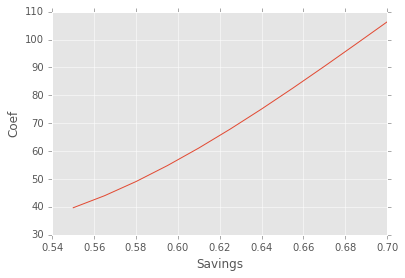

In [41]:
i = 0
for step in np.linspace(0.55, 0.7, num=11):
    #call function, get percent_savings
    y_test[i] = spline(step)
    x_test[i] = step
    i = i + 1
#draw graph
plot_xy(x_test, y_test, 'Savings','Coef')

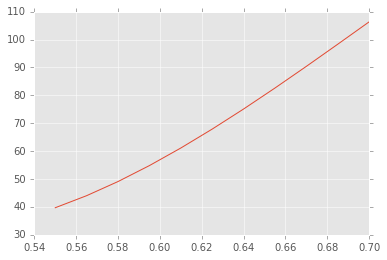

In [42]:
plt.plot(x_test, y_test)

In [36]:
def plot_xy(x_, y_, title_x, title_y):    


    plt.subplots_adjust(hspace=0.5)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.plot(x_, y_)

    ax.set_xlabel(title_x)
    ax.set_ylabel(title_y)

    plt_name = title_x + '-' + title_y + '.png'
    
#    plt.savefig(plt_name, dpi=300)
    plt.show()